In [4]:
import os.path

import numpy as np

!pip install pandas
import pandas as pd

!pip install matplotlib
import matplotlib.pyplot as plt

!pip install seaborn
import seaborn as sns
import warnings

!pip install imblearn
%matplotlib inline
sns.set()
warnings.filterwarnings("ignore")


[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'c:\\users\\yashj\\appdata\\local\\programs\\python\\python310\\lib\\site-packages\\matplotlib-3.5.2.dist-info\\METADATA'


[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'c:\\users\\yashj\\appdata\\local\\programs\\python\\python310\\lib\\site-packages\\matplotlib-3.5.2.dist-info\\METADATA'


[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Loading the cleaned data

In [5]:
bank_additional_cleaned = pd.read_csv('bank_additional_cleaned.csv')
bank_additional_cleaned.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,cons.price.idx,cons.conf.idx,y,PC1
0,56.0,housemaid,married,basic.4y,no,no,telephone,may,mon,261.0,1.0,0.0,nonexistent,93.994,-36.4,0.0,-1.015079
1,57.0,services,married,high.school,no,no,telephone,may,mon,149.0,1.0,0.0,nonexistent,93.994,-36.4,0.0,-1.015079
2,37.0,services,married,high.school,yes,no,telephone,may,mon,226.0,1.0,0.0,nonexistent,93.994,-36.4,0.0,-1.015079
3,40.0,admin.,married,basic.6y,no,no,telephone,may,mon,151.0,1.0,0.0,nonexistent,93.994,-36.4,0.0,-1.015079
4,56.0,services,married,high.school,no,yes,telephone,may,mon,307.0,1.0,0.0,nonexistent,93.994,-36.4,0.0,-1.015079


In [6]:
bank_additional_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37091 entries, 0 to 37090
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37091 non-null  float64
 1   job             37091 non-null  object 
 2   marital         37091 non-null  object 
 3   education       37091 non-null  object 
 4   housing         37091 non-null  object 
 5   loan            37091 non-null  object 
 6   contact         37091 non-null  object 
 7   month           37091 non-null  object 
 8   day_of_week     37091 non-null  object 
 9   duration        37091 non-null  float64
 10  campaign        37091 non-null  float64
 11  previous        37091 non-null  float64
 12  poutcome        37091 non-null  object 
 13  cons.price.idx  37091 non-null  float64
 14  cons.conf.idx   37091 non-null  float64
 15  y               37091 non-null  float64
 16  PC1             33551 non-null  float64
dtypes: float64(8), object(9)
memory

### Statistical Analysis

In [7]:
bank_additional_cleaned.describe()

,age,duration,campaign,previous,cons.price.idx,cons.conf.idx,y,PC1
count,37091.000000,37091.000000,37091.000000,37091.000000,37091.00000,37091.000000,37091.000000,33551.000000
mean,39.976598,218.028713,2.120568,0.180367,93.56047,-40.497487,0.092961,0.044708
std,10.444553,157.078688,1.416336,0.504639,0.58065,4.677442,0.290381,1.708397
min,17.000000,0.000000,1.000000,0.000000,92.20100,-50.800000,0.000000,-1.453686
25%,32.000000,103.000000,1.000000,0.000000,93.07500,-42.700000,0.000000,-1.450672
50%,38.000000,174.000000,2.000000,0.000000,93.44400,-41.800000,0.000000,-1.015079
75%,47.000000,293.000000,3.000000,0.000000,93.99400,-36.400000,0.000000,1.946853
max,98.000000,752.000000,7.000000,7.000000,94.76700,-26.900000,1.000000,3.376641


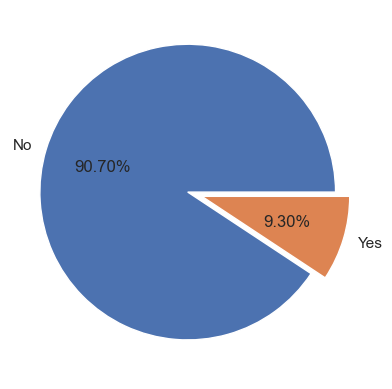

In [8]:
plt.pie(bank_additional_cleaned['y'].map({0:'No',1:'Yes'}).value_counts(),labels = bank_additional_cleaned['y'].map({0:'No',1:'Yes'}).value_counts().index.tolist(), autopct='%1.2f%%',explode=[0.05]*2)
plt.show()

### EDA of numerical features

#### 1. Correlation matrix

<Axes: >

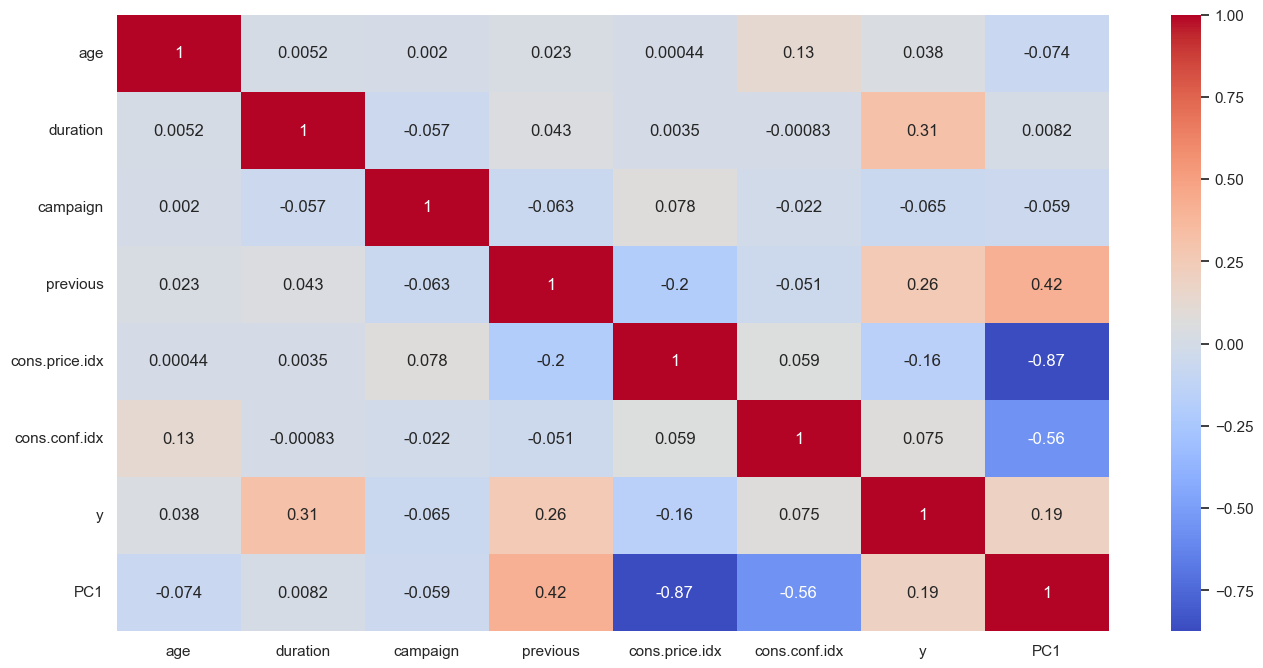

In [9]:
corr_matrix = bank_additional_cleaned.select_dtypes(exclude="object").corr()
plt.figure(figsize=(16,8))
sns.heatmap(corr_matrix,cmap="coolwarm",annot=True)

### 2. Visualizing distributions for each category of target variable

In [10]:
fig = plt.figure(figsize=(25,20))
X_num_features = list(bank_additional_cleaned.select_dtypes(exclude="object").columns.values)
X_num_features.remove('y')

<Figure size 2500x2000 with 0 Axes>

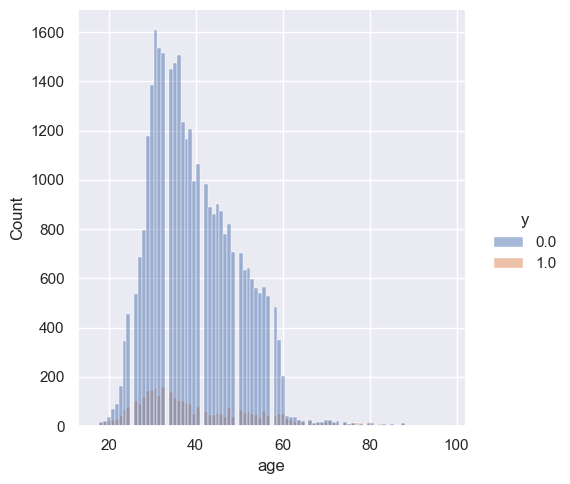

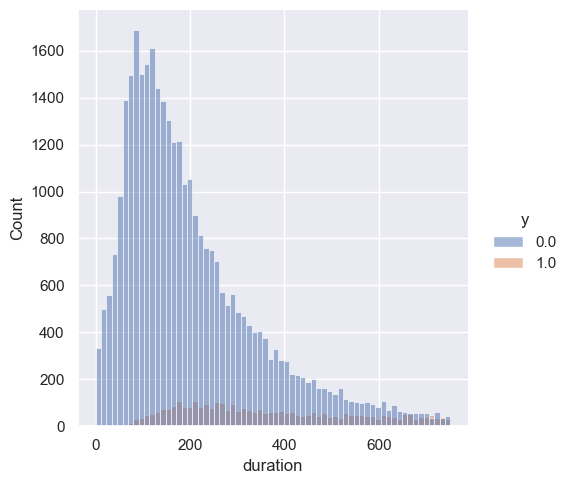

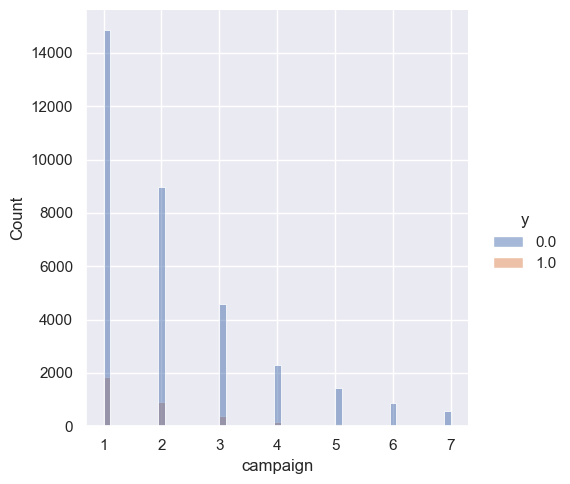

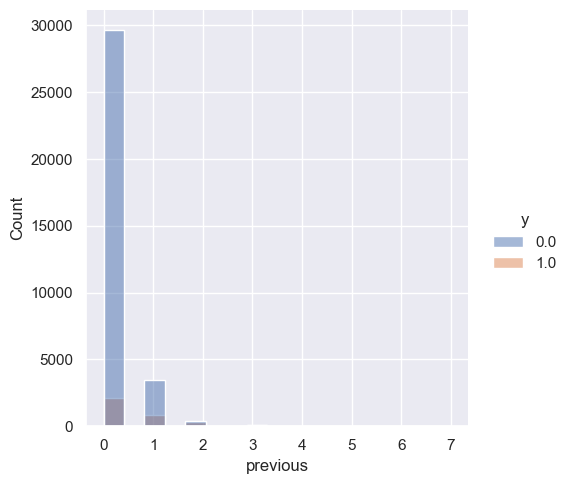

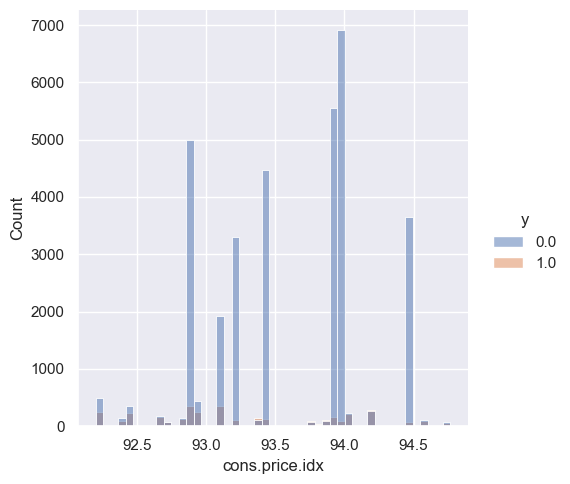

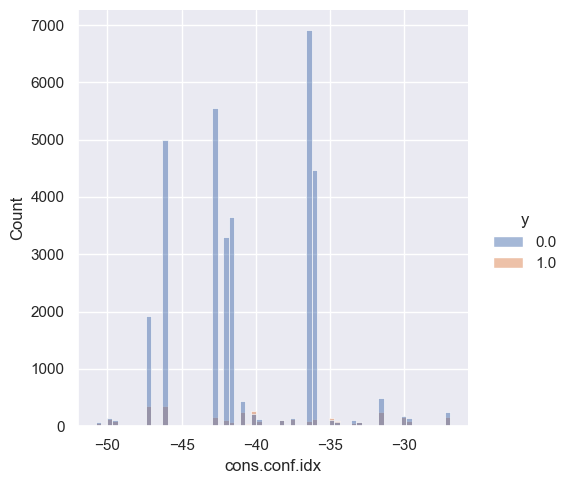

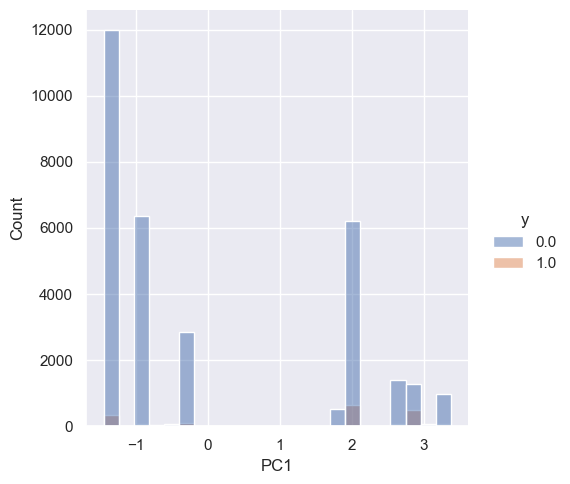

In [11]:
for index, feature in enumerate(X_num_features):
    fig.add_subplot(4,2,index+1).set_title(feature)
    sns.displot(data=bank_additional_cleaned, x=feature, hue='y')

In [12]:
print("Target imbalance")
print(f"{(bank_additional_cleaned['y'].sum()/ bank_additional_cleaned['y'].shape[0]) * 100}")

Target imbalance
9.296055646922435


#### Observations:

- Age: Most of the calls were made to people aged 25-50. Percentage of subscriptions seems to be approximately constant across all ages.
- Duration: As expected, percentage of subscriptions increases with the increase in call duration.
- Campaign: There seems to be almost no subscriptions for more than 4 contacts in the current campaign
- Previous: Data is heavily skewed to number of contacts = 1. Percentage of conversion seems to be consistent with overall value.
- cons.price.idx, cons.conf.index and PC1: There seems to be some correlation with target variable. But the trend is not clear, this may be clearer when coupled with month and year values.

### EDA of categorical features

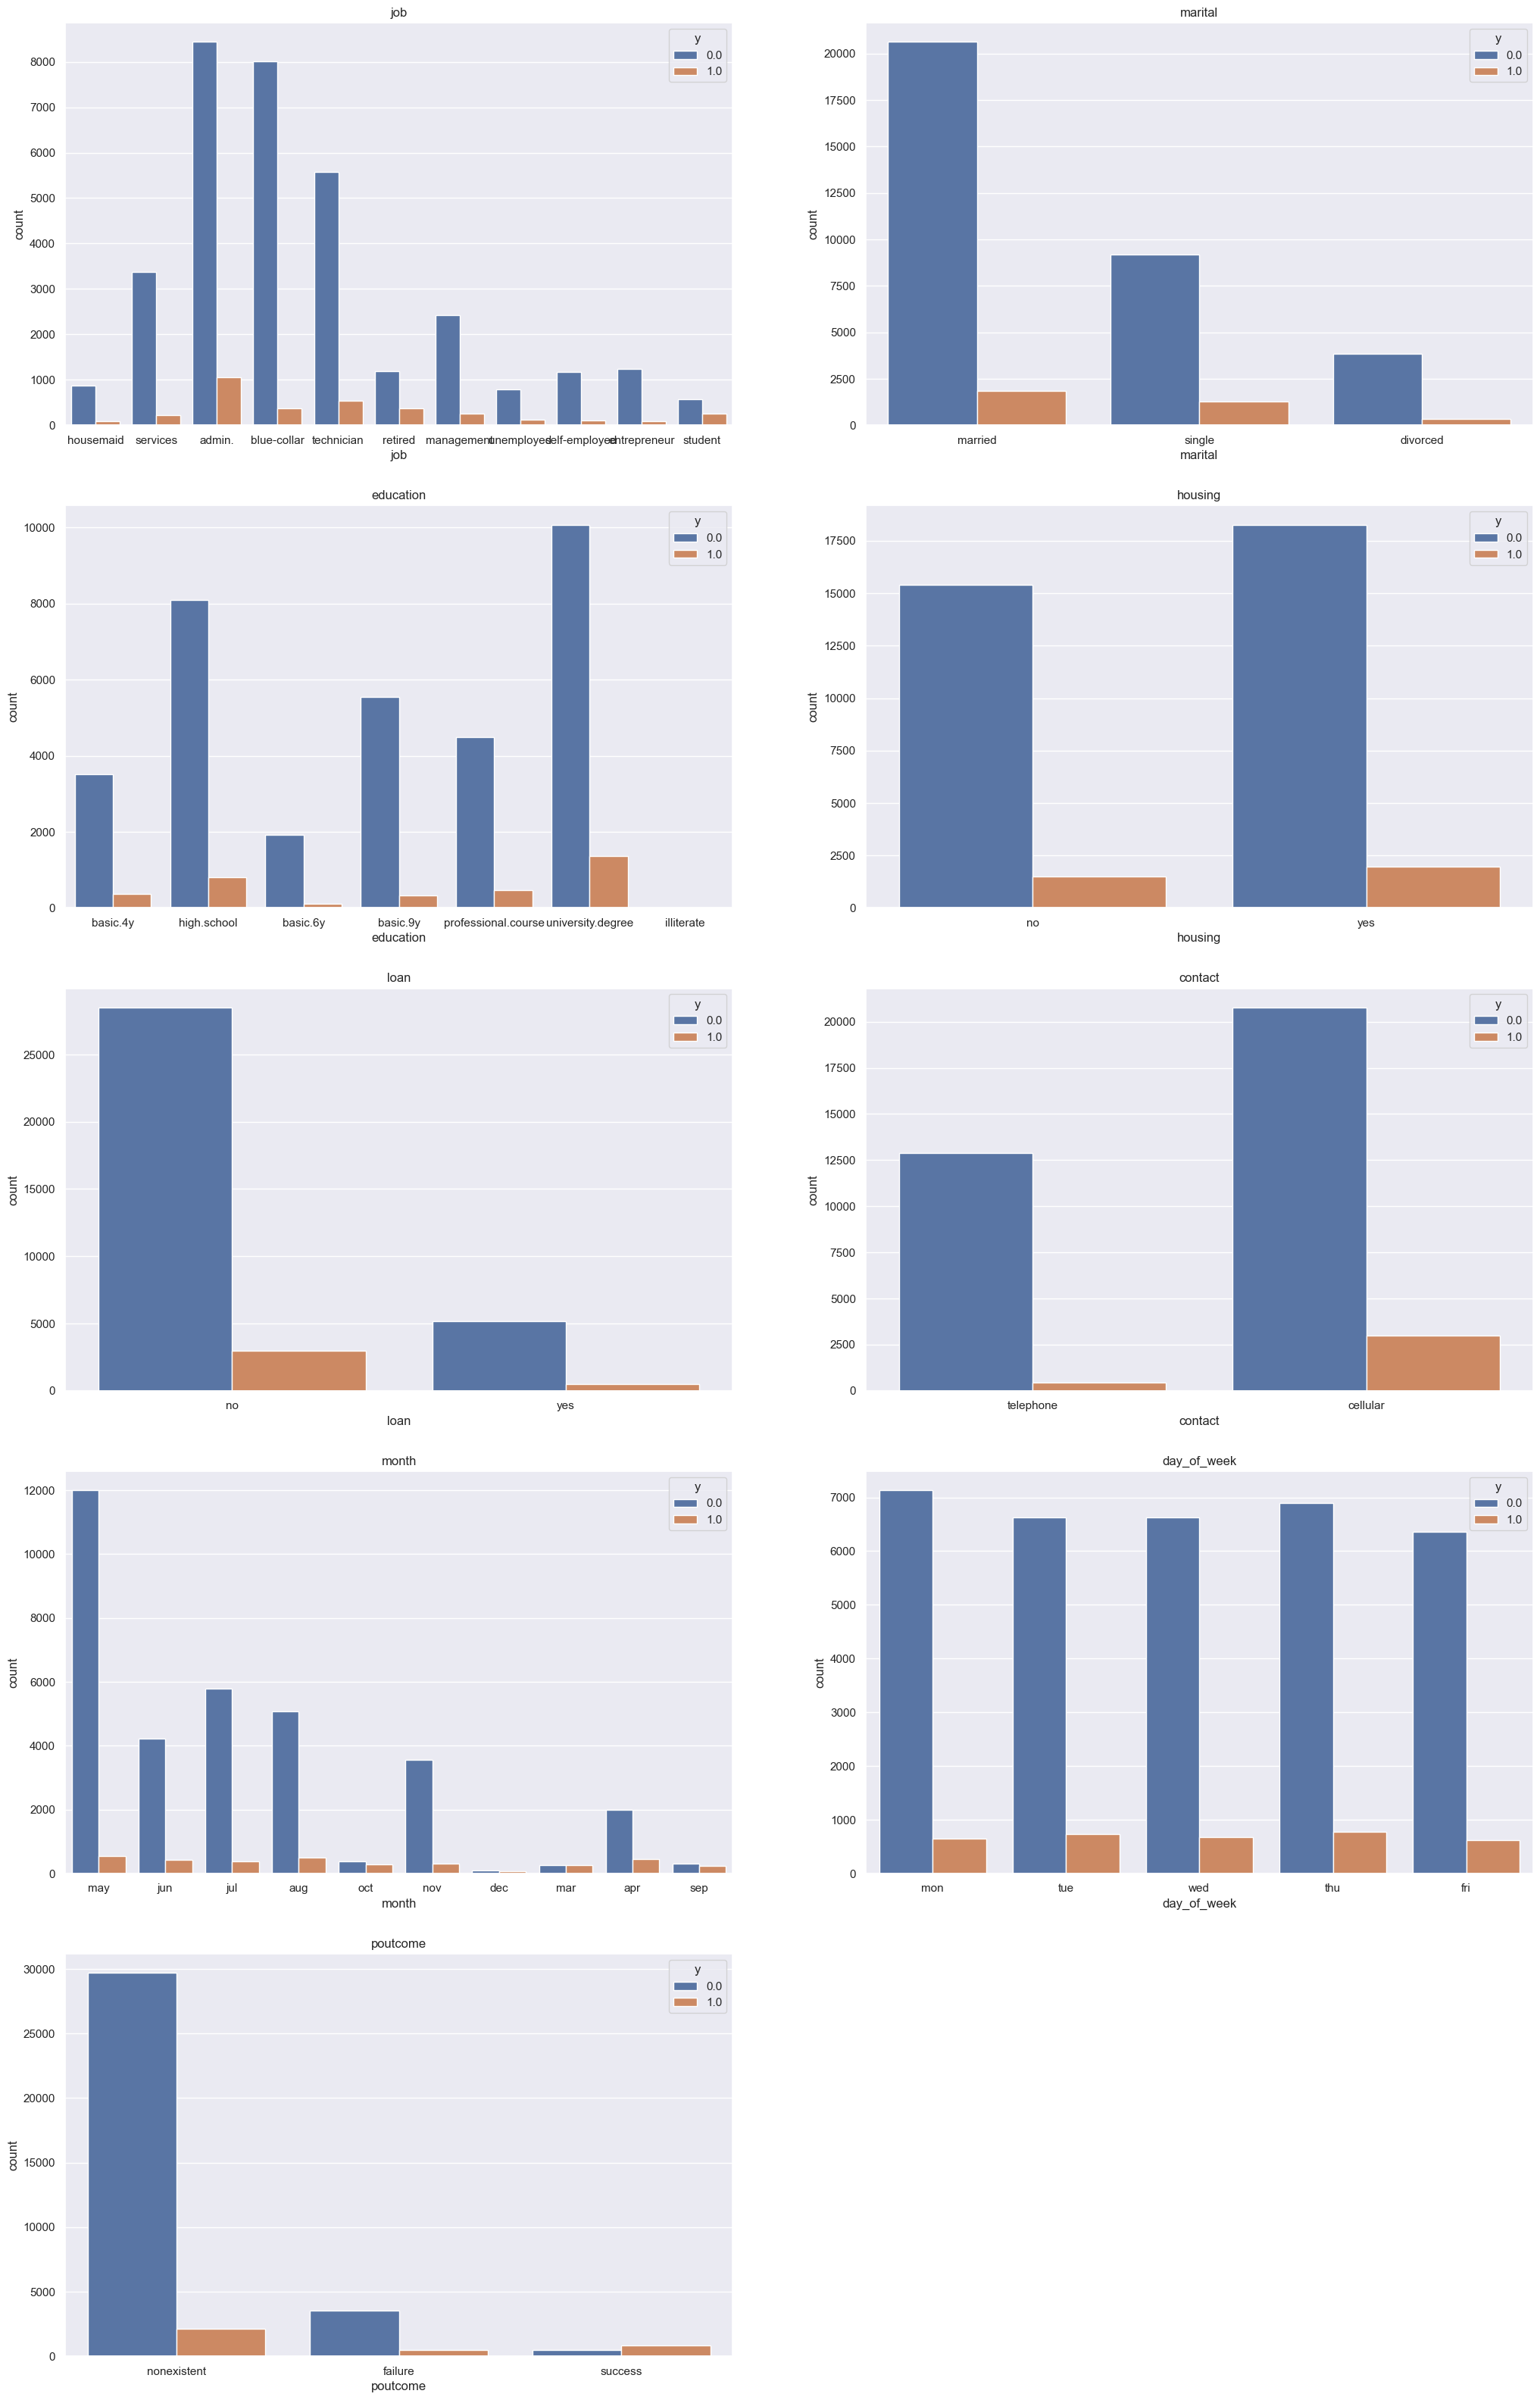

In [13]:
X_cat_features = bank_additional_cleaned.select_dtypes(include='object').columns.values
fig = plt.figure(figsize=(25,40))

for index, feature in enumerate(X_cat_features):
    fig.add_subplot(5,2,index+1).set_title(feature)
    sns.countplot(data=bank_additional_cleaned, x=feature, hue='y')

In [14]:
print("Percentage of subscriptions for each category")
print("=====================================================")
for feature in X_cat_features:
    print(feature)
    for category in bank_additional_cleaned[feature].unique():
        temp_df = bank_additional_cleaned.loc[bank_additional_cleaned[feature]==category]
        print(f"{category}: {(temp_df['y'].sum()/temp_df['y'].shape[0]) * 100} %")
    print("------------------------------------------------------------------------------")

Percentage of subscriptions for each category
job
housemaid: 9.062170706006324 %
services: 6.101978266926721 %
admin.: 11.114622840286557 %
blue-collar: 4.457687723480333 %
technician: 8.804312316236523 %
retired: 24.091778202676863 %
management: 9.22038980509745 %
unemployed: 13.37719298245614 %
self-employed: 8.091123330714847 %
entrepreneur: 5.998481397114654 %
student: 30.493827160493826 %
------------------------------------------------------------------------------
marital
married: 8.127617859370822 %
single: 12.133371548676793 %
divorced: 8.464849354375897 %
------------------------------------------------------------------------------
education
basic.4y: 9.375 %
high.school: 9.137911655614252 %
basic.6y: 5.438510534051935 %
basic.9y: 5.415531335149864 %
professional.course: 9.582408714948558 %
university.degree: 11.935991605456453 %
illiterate: 18.75 %
------------------------------------------------------------------------------
housing
no: 8.783062507413119 %
yes: 9.723664046

### Observations:
- job: 'admin','blue-collar' and 'technician' jobs were contacted most. 'Retired' and 'Student' categories gave the highest percentage of subscriptions
- marital: most of the people contacted were married. The percentage of subscriptions didn't seem to change much with marital status
- education: most of the people contacted had either 'university.degree' or 'high.school' as their highest level of education. Though, 'illiterate' customers gave the highest percentage of subscriptions
- housing: There is no imbalance observed with respect to housing. The percentage of subscription also seems to be constant.
- loan: Most of the people contacted didn't have a personal loan. People without personal loan did seem to be more likely to subscribe but the difference between the two categories is small.
- contact: most of the people were contacted through a cellphone. This did result in a significantly higher percentage of subscriptions.
- month: During the months of January and February, there were no significant calls reported. However, the highest number of calls were recorded in May, which is likely attributed to the beginning of a new financial year and the customary annual increments for employees. Most of the contacts were made in the second quarter. Some months gave a significantly higher percentage of subscriptions than other months, but the trend is not very clear and there may be other factors at play here.
- day_of_week: Number of contacts and percentage of subscriptions doesn't seem to change much with day of the week.
- poutcome: The outcome of previous campaigns was "nonexistent" for most of the contacts. Although, the success of previous campaigns did seem to positively impact the subscriptions of current campaign.

### Individual feature analysis

#### Age

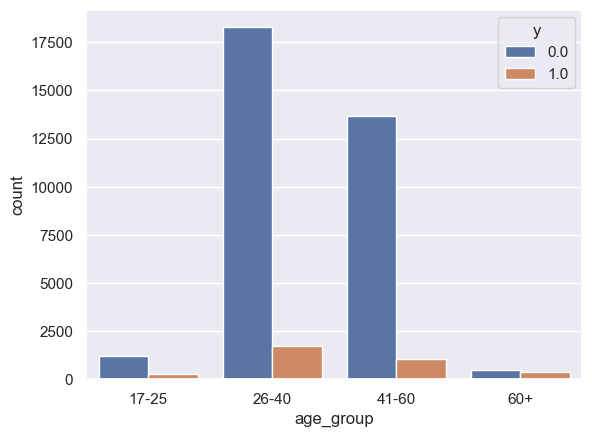

In [15]:
bin_edges = [17, 25, 40,60, float('inf')]
bin_labels = ['17-25', '26-40', '41-60', '60+']

bank_additional_cleaned['age_group'] = pd.cut(bank_additional_cleaned['age'], bins=bin_edges, labels=bin_labels, include_lowest = True)

sns.countplot(x='age_group',data=bank_additional_cleaned,hue='y')
plt.show()

In [16]:
bank_additional_cleaned[['age_group', 'y']].groupby(['age_group']).mean().sort_values('y',ascending=False)

,y
age_group,
60+,0.449173
17-25,0.196939
26-40,0.086872
41-60,0.070158


#### Job

In [17]:
bank_additional_cleaned[['job', 'y']].groupby(['job']).mean().sort_values('y',ascending=False)

,y
job,
student,0.304938
retired,0.240918
unemployed,0.133772
admin.,0.111146
management,0.092204
housemaid,0.090622
technician,0.088043
self-employed,0.080911
services,0.061020


#### Education

In [18]:
bank_additional_cleaned[['education', 'y']].groupby(['education']).mean().sort_values('y',ascending=False)

,y
education,
illiterate,0.187500
university.degree,0.119360
professional.course,0.095824
basic.4y,0.093750
high.school,0.091379
basic.6y,0.054385
basic.9y,0.054155


#### Duration

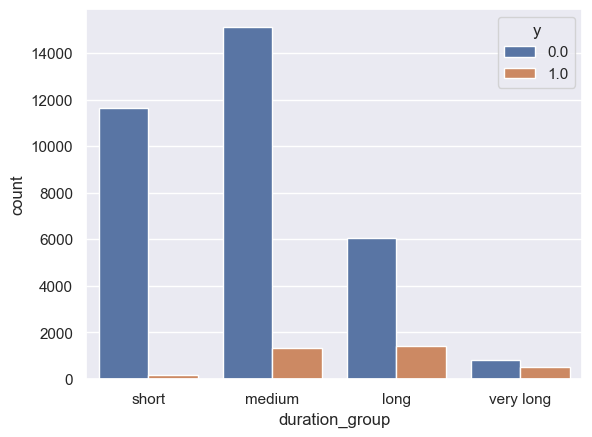

In [19]:
bin_edges = [0, 120, 300, 600, float('inf')]
bin_labels = ['short', 'medium', 'long', 'very long']

bank_additional_cleaned['duration_group'] = pd.cut(bank_additional_cleaned['duration'], bins=bin_edges, labels=bin_labels, include_lowest = True)

sns.countplot(x='duration_group',data=bank_additional_cleaned,hue='y')
plt.show()

In [20]:
bank_additional_cleaned[['duration_group', 'y']].groupby(['duration_group']).mean().sort_values('y',ascending=False)

,y
duration_group,
very long,0.396296
long,0.188835
medium,0.081035
short,0.013994


#### Month

In [21]:
bank_additional_cleaned[['month', 'y']].groupby(['month']).mean().sort_values('y',ascending=False)

,y
month,
mar,0.502890
dec,0.481928
sep,0.435361
oct,0.431751
apr,0.180999
jun,0.090517
aug,0.087340
nov,0.081130
jul,0.061578


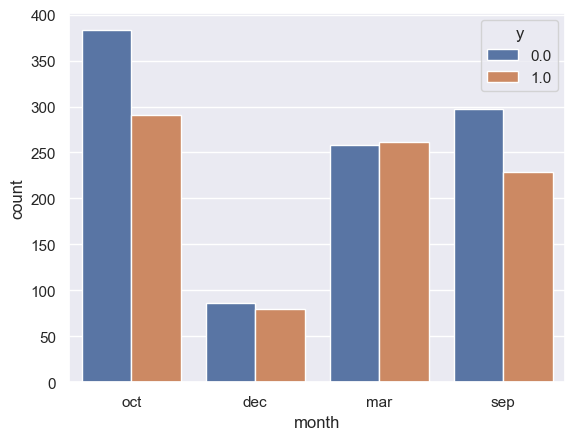

In [22]:
sns.countplot(x='month',data=bank_additional_cleaned[bank_additional_cleaned.month.isin(['mar','dec','sep','oct'])],hue='y')
plt.show()

March had the most conversions for the bank's term deposit product despite only around 500 calls. The success may have been influenced by factors like interest rates, promotions, and sales representatives.

#### Campaign

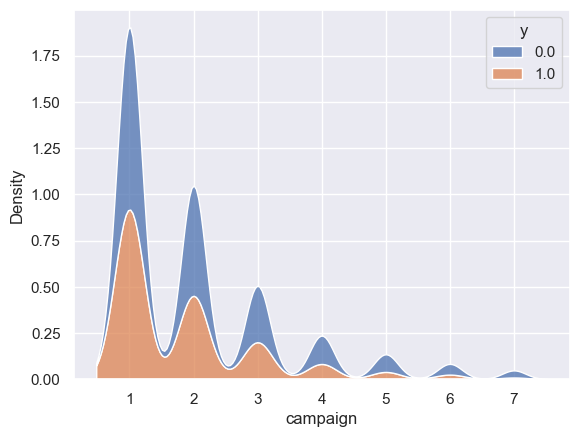

In [23]:
sns.kdeplot(data=bank_additional_cleaned, x="campaign", hue="y", multiple="stack", common_norm=False)
plt.show()

In [24]:
bank_additional_cleaned[['campaign', 'y']].groupby(['campaign']).mean().sort_values('y',ascending=False)

,y
campaign,
1.0,0.109801
2.0,0.091194
3.0,0.080096
4.0,0.066613
6.0,0.054113
5.0,0.052076
7.0,0.031879


#### previous

In [25]:
bank_additional_cleaned.describe()['previous']

count    37091.000000
mean         0.180367
std          0.504639
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: previous, dtype: float64

In [26]:
bank_additional_cleaned[['previous', 'y']].groupby(['previous']).mean().sort_values('y',ascending=False)

,y
previous,
5.0,0.722222
6.0,0.600000
3.0,0.580000
4.0,0.544118
2.0,0.444763
1.0,0.195020
0.0,0.067002
7.0,0.000000


#### poutcome

In [27]:
bank_additional_cleaned[['poutcome', 'y']].groupby(['poutcome']).mean().sort_values('y',ascending=False)

,y
poutcome,
success,0.643975
failure,0.123253
nonexistent,0.067002


##### Drop age group and duration group they are useful for EDA but model might be less accurate

## Hypothesis testing

#### Testing correlation between month and economical indicators

In [28]:
bank_additional_cleaned.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,cons.price.idx,cons.conf.idx,y,PC1,age_group,duration_group
0,56.0,housemaid,married,basic.4y,no,no,telephone,may,mon,261.0,1.0,0.0,nonexistent,93.994,-36.4,0.0,-1.015079,41-60,medium
1,57.0,services,married,high.school,no,no,telephone,may,mon,149.0,1.0,0.0,nonexistent,93.994,-36.4,0.0,-1.015079,41-60,medium
2,37.0,services,married,high.school,yes,no,telephone,may,mon,226.0,1.0,0.0,nonexistent,93.994,-36.4,0.0,-1.015079,26-40,medium
3,40.0,admin.,married,basic.6y,no,no,telephone,may,mon,151.0,1.0,0.0,nonexistent,93.994,-36.4,0.0,-1.015079,26-40,medium
4,56.0,services,married,high.school,no,yes,telephone,may,mon,307.0,1.0,0.0,nonexistent,93.994,-36.4,0.0,-1.015079,41-60,long


In [29]:
from scipy import stats

# Convert columns from float to object
bank_additional_cleaned['cons.conf.idx'] = bank_additional_cleaned['cons.conf.idx'].astype(object)
bank_additional_cleaned['cons.price.idx'] = bank_additional_cleaned['cons.price.idx'].astype(object)
bank_additional_cleaned['PC1'] = bank_additional_cleaned['PC1'].astype(object)

# Set the print options to display the full p-value
np.set_printoptions(precision=5, suppress=True)


# Perform hypothesis test for relationship with month
columns_to_test = ['cons.conf.idx', 'cons.price.idx', 'PC1']
threshold = 0.02

for column in columns_to_test:
    contingency_table = pd.crosstab(bank_additional_cleaned[column], bank_additional_cleaned['month'])
    chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
    print(f"Relation between {column} and month:")
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p_value}")
    print("---------------------------------------------------------------------------------------")
    if p_value < threshold:
        print(f"The p-value is below the threshold of {threshold}. There is significant difference between month and {column}.")
    else:
        print(f"The p-value is above the threshold of {threshold}. No significant difference between month and {column}.")
    print("===============================================================================")

Relation between cons.conf.idx and month:
Chi-square statistic: 333819.0
P-value: 0.0
---------------------------------------------------------------------------------------
The p-value is below the threshold of 0.02. There is significant difference between month and cons.conf.idx.
Relation between cons.price.idx and month:
Chi-square statistic: 333818.99999999994
P-value: 0.0
---------------------------------------------------------------------------------------
The p-value is below the threshold of 0.02. There is significant difference between month and cons.price.idx.
Relation between PC1 and month:
Chi-square statistic: 155791.85127762248
P-value: 0.0
---------------------------------------------------------------------------------------
The p-value is below the threshold of 0.02. There is significant difference between month and PC1.


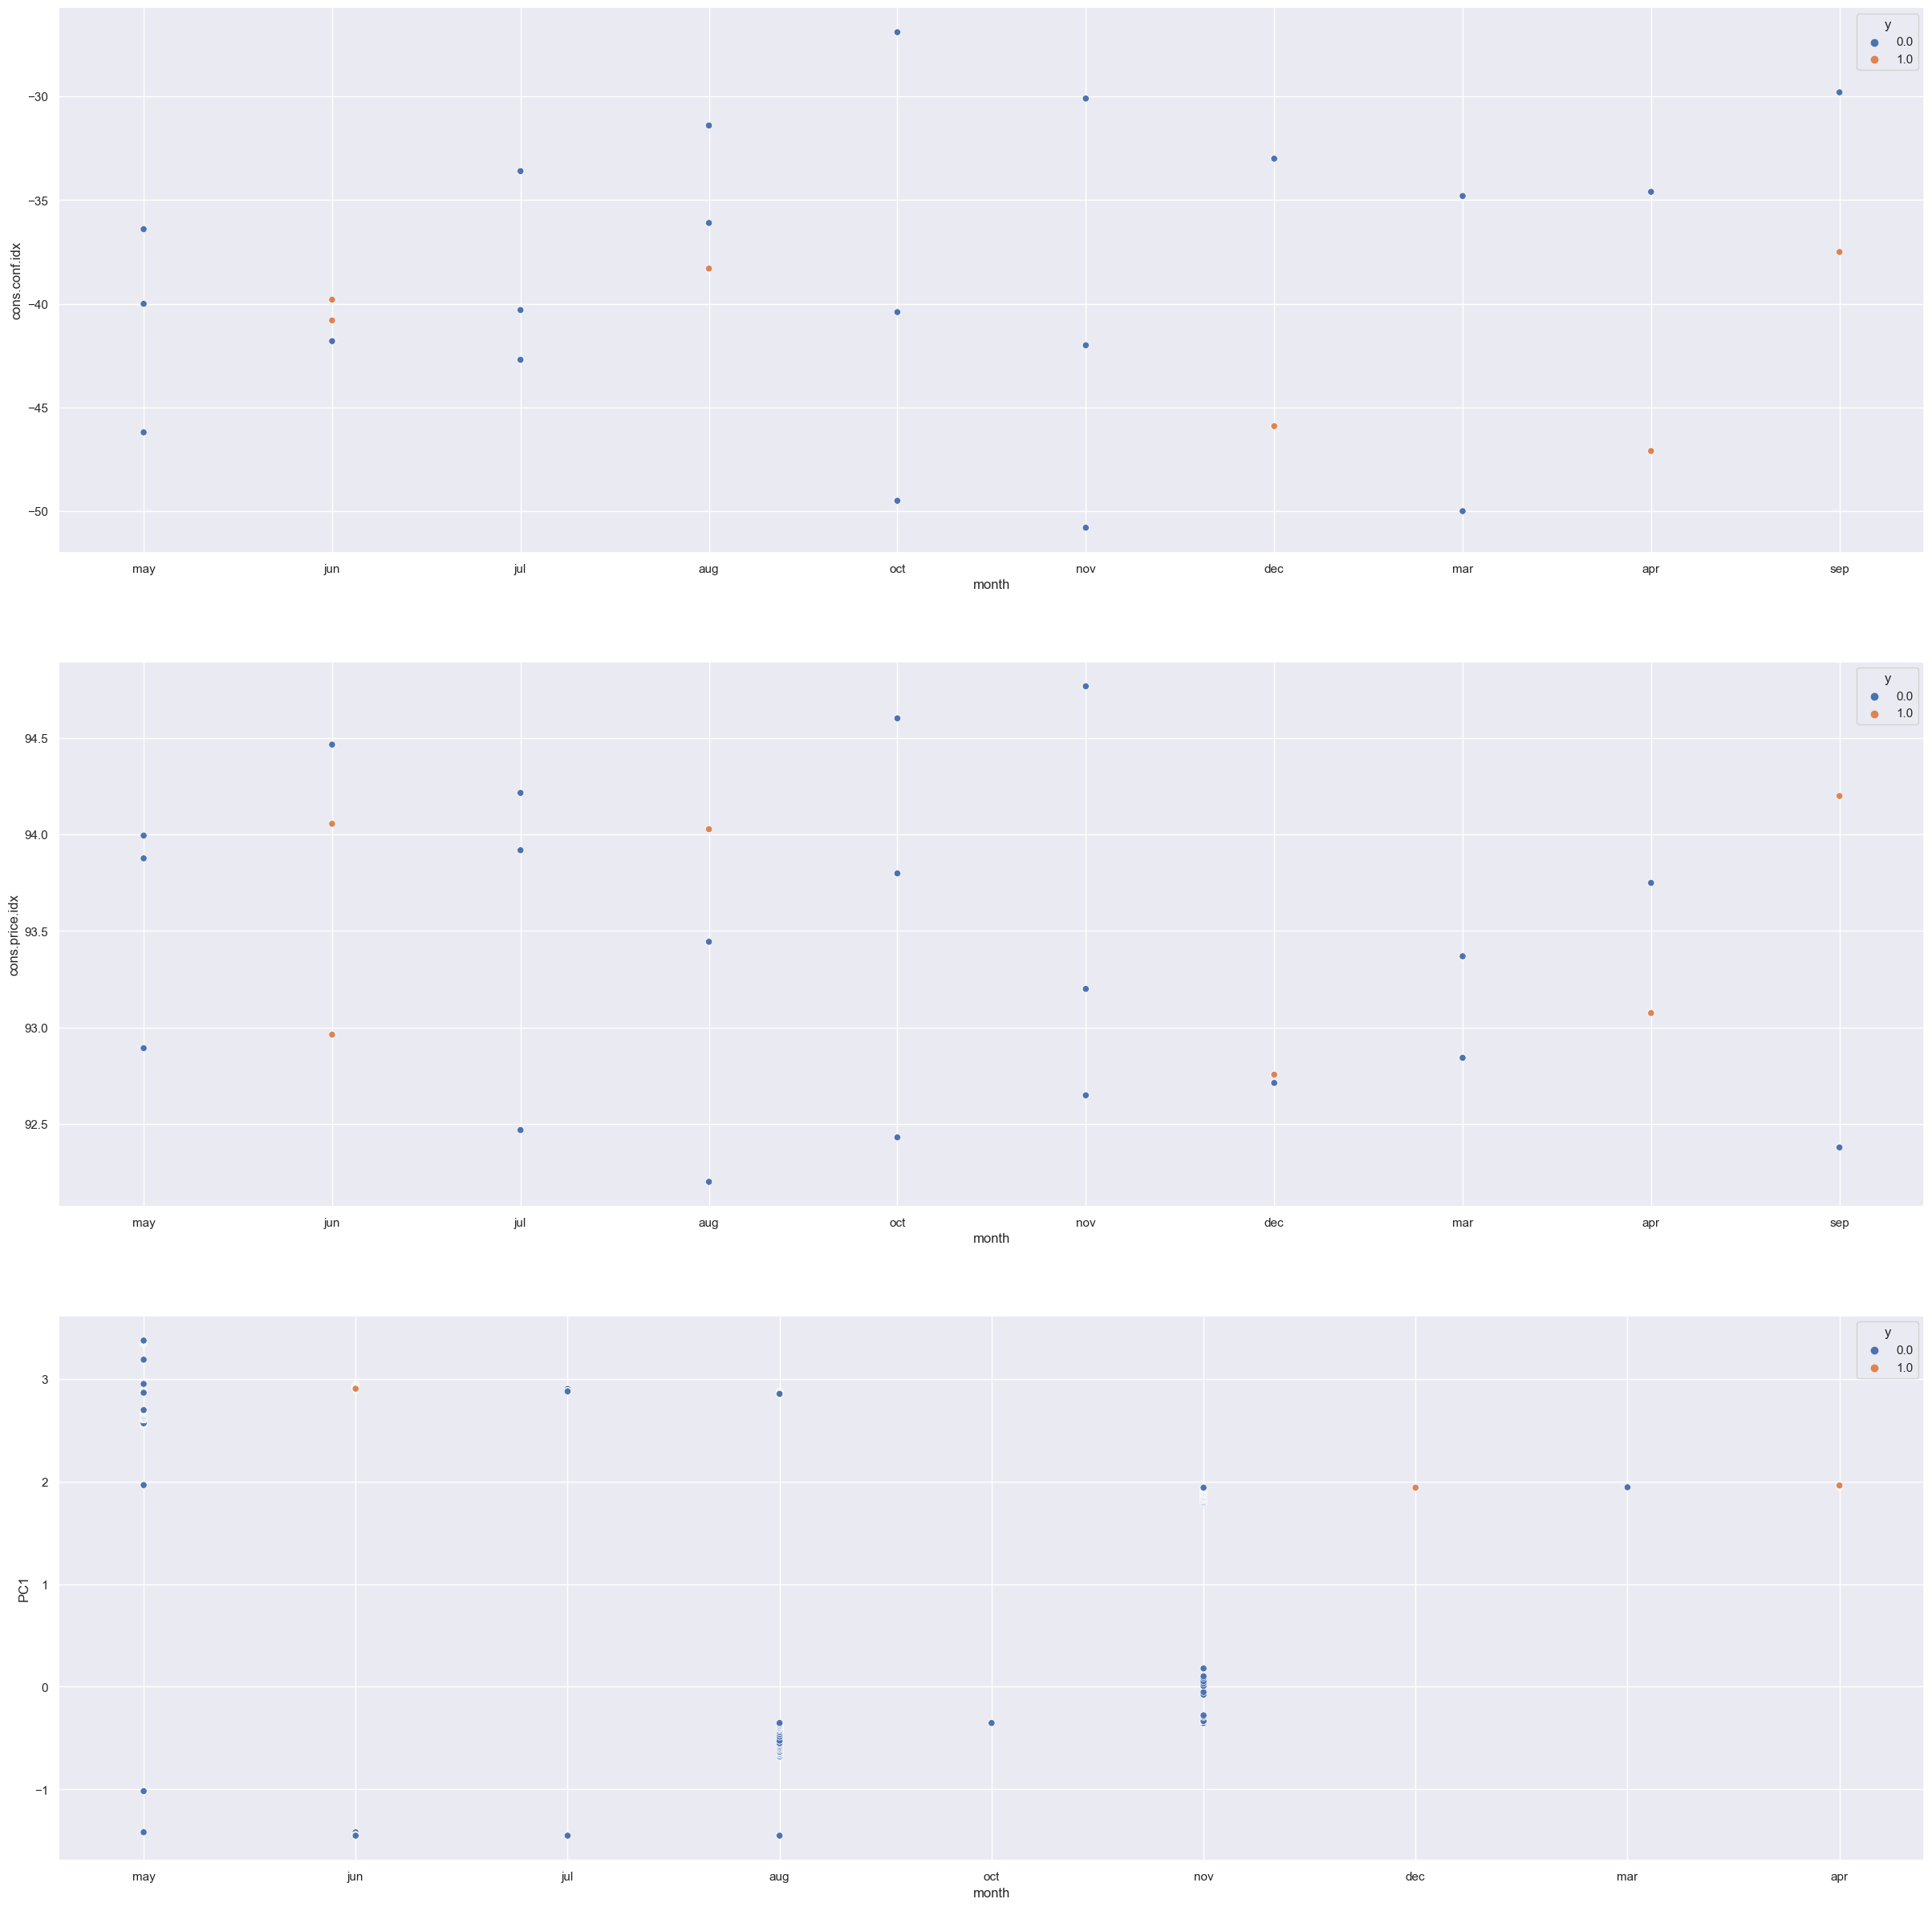

In [30]:
fig = plt.figure(figsize=(30,30))
for i,column in enumerate(columns_to_test):
    fig.add_subplot(3,1,i+1)
    sns.scatterplot(data=bank_additional_cleaned, x='month', y=column, hue='y')


## Models for Week 11 (Yash Jadwani)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [32]:
bank_additional_cleaned['education'] = bank_additional_cleaned['education'].str.replace('.',' ',regex=True)

In [33]:
cat_cols = list(bank_additional_cleaned.select_dtypes(include=['object','category']).columns)

le = LabelEncoder()
for col in cat_cols:
    bank_additional_cleaned[col] = le.fit_transform(bank_additional_cleaned[col].astype(str))

bank_additional_cleaned

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,cons.price.idx,cons.conf.idx,y,PC1,age_group,duration_group
0,56.0,3,1,0,0,0,1,6,1,261.0,1.0,0.0,1,18,9,0.0,34,2,1
1,57.0,7,1,3,0,0,1,6,1,149.0,1.0,0.0,1,18,9,0.0,33,2,1
2,37.0,7,1,3,1,0,1,6,1,226.0,1.0,0.0,1,18,9,0.0,33,1,1
3,40.0,0,1,1,0,0,1,6,1,151.0,1.0,0.0,1,18,9,0.0,33,1,1
4,56.0,7,1,3,0,1,1,6,1,307.0,1.0,0.0,1,18,9,0.0,33,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37086,73.0,5,1,5,1,0,0,7,0,334.0,1.0,0.0,1,25,25,1.0,349,3,0
37087,46.0,1,1,5,0,0,0,7,0,383.0,1.0,0.0,1,25,25,0.0,349,2,0
37088,56.0,5,1,6,1,0,0,7,0,189.0,2.0,0.0,1,25,25,0.0,349,2,1
37089,44.0,9,1,5,0,0,0,7,0,442.0,1.0,0.0,1,25,25,1.0,349,2,0


In [34]:
bank_additional_cleaned['age'] = bank_additional_cleaned.age.astype(int)
bank_additional_cleaned['campaign'] = bank_additional_cleaned.campaign.astype(int)
bank_additional_cleaned['previous'] = bank_additional_cleaned.previous.astype(int)
bank_additional_cleaned['poutcome'] = bank_additional_cleaned.poutcome.astype(int)
bank_additional_cleaned['y'] = bank_additional_cleaned.y.astype(int)

In [35]:
bank_additional_cleaned

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,cons.price.idx,cons.conf.idx,y,PC1,age_group,duration_group
0,56,3,1,0,0,0,1,6,1,261.0,1,0,1,18,9,0,34,2,1
1,57,7,1,3,0,0,1,6,1,149.0,1,0,1,18,9,0,33,2,1
2,37,7,1,3,1,0,1,6,1,226.0,1,0,1,18,9,0,33,1,1
3,40,0,1,1,0,0,1,6,1,151.0,1,0,1,18,9,0,33,1,1
4,56,7,1,3,0,1,1,6,1,307.0,1,0,1,18,9,0,33,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37086,73,5,1,5,1,0,0,7,0,334.0,1,0,1,25,25,1,349,3,0
37087,46,1,1,5,0,0,0,7,0,383.0,1,0,1,25,25,0,349,2,0
37088,56,5,1,6,1,0,0,7,0,189.0,2,0,1,25,25,0,349,2,1
37089,44,9,1,5,0,0,0,7,0,442.0,1,0,1,25,25,1,349,2,0


In [36]:
bank_additional_cleaned.isnull().sum()

age               0
job               0
marital           0
education         0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
previous          0
poutcome          0
cons.price.idx    0
cons.conf.idx     0
y                 0
PC1               0
age_group         0
duration_group    0
dtype: int64

In [37]:
bank_additional_cleaned.dropna(inplace=True)
bank_additional_cleaned.isnull().sum()

age               0
job               0
marital           0
education         0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
previous          0
poutcome          0
cons.price.idx    0
cons.conf.idx     0
y                 0
PC1               0
age_group         0
duration_group    0
dtype: int64

In [38]:
X = bank_additional_cleaned.drop('y', axis = 1)
Y = bank_additional_cleaned['y']


X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 1)

### Treating data imbalance with SMOTE

In [39]:
sm = SMOTE(random_state=42)
X_train, Y_train = sm.fit_resample(X_train, Y_train)

In [40]:
imputer = SimpleImputer()
X_train = imputer.fit_transform(X_train)

In [41]:
Y_train.value_counts()

0    23520
1    23520
Name: y, dtype: int64

In [42]:
def printClassificationAndConfusionMatrix(y_test,y_pred,classifier):
    print(f'Scores for {classifier}\n')

    print(classification_report(y_test, y_pred))
    print("Test Accuracy:",round(accuracy_score(y_pred, y_test),2))

    plt.figure(figsize=(5,4))
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    sns.heatmap(confusion_matrix,annot=True, fmt="d",cmap="Blues")
    plt.title(f'Confusion Matrix : {classifier}')
    plt.show()


### Models


Logistic Regression 

Logistic Regression Train Accuracy: 86.86 %

Scores for Logistic Regression

              precision    recall  f1-score   support

           0       0.97      0.86      0.91     10123
           1       0.34      0.74      0.46      1005

    accuracy                           0.84     11128
   macro avg       0.65      0.80      0.69     11128
weighted avg       0.91      0.84      0.87     11128

Test Accuracy: 0.84


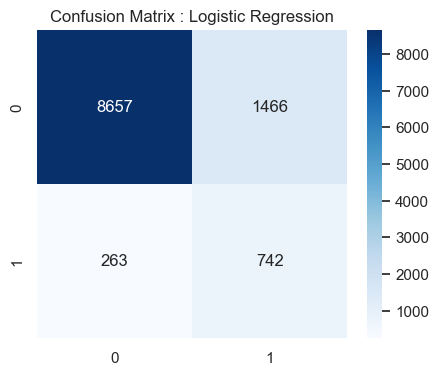

------------------------------------------------------------------------

Random Tree Classifier 

Random Tree Classifier Train Accuracy: 95.57 %

Scores for Random Tree Classifier

              precision    recall  f1-score   support

           0       0.97      0.94      0.95     10123
           1       0.54      0.66      0.59      1005

    accuracy                           0.92     11128
   macro avg       0.75      0.80      0.77     11128
weighted avg       0.93      0.92      0.92     11128

Test Accuracy: 0.92


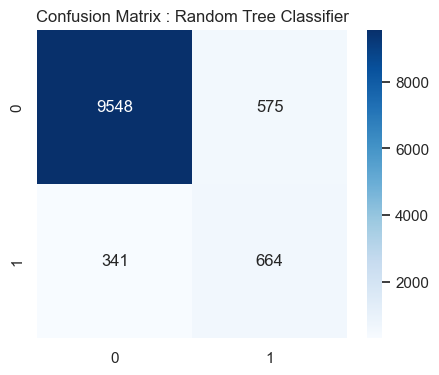

------------------------------------------------------------------------

Decision Tree 

Decision Tree Train Accuracy: 93.26 %

Scores for Decision Tree

              precision    recall  f1-score   support

           0       0.96      0.93      0.94     10123
           1       0.44      0.58      0.50      1005

    accuracy                           0.90     11128
   macro avg       0.70      0.75      0.72     11128
weighted avg       0.91      0.90      0.90     11128

Test Accuracy: 0.9


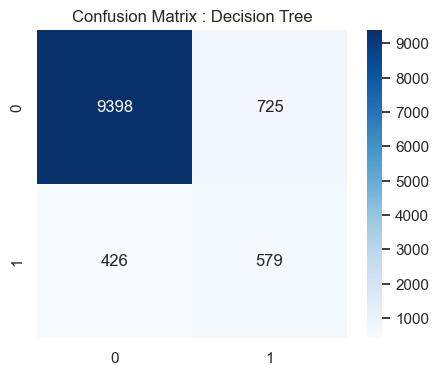

------------------------------------------------------------------------

Xg Boost 

Xg Boost Train Accuracy: 94.35 %

Scores for Xg Boost

              precision    recall  f1-score   support

           0       0.97      0.94      0.95     10123
           1       0.52      0.66      0.58      1005

    accuracy                           0.91     11128
   macro avg       0.74      0.80      0.77     11128
weighted avg       0.93      0.91      0.92     11128

Test Accuracy: 0.91


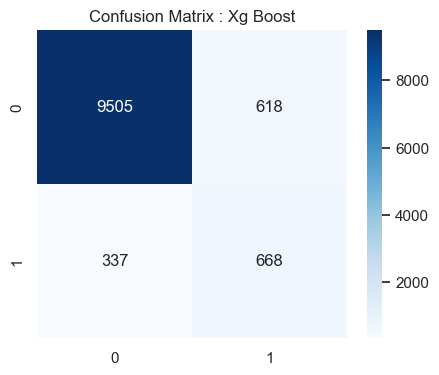

------------------------------------------------------------------------

K Nearest Neighbors 

K Nearest Neighbors Train Accuracy: 92.99 %

Scores for K Nearest Neighbors

              precision    recall  f1-score   support

           0       0.98      0.87      0.92     10123
           1       0.38      0.80      0.52      1005

    accuracy                           0.86     11128
   macro avg       0.68      0.84      0.72     11128
weighted avg       0.92      0.86      0.88     11128

Test Accuracy: 0.86


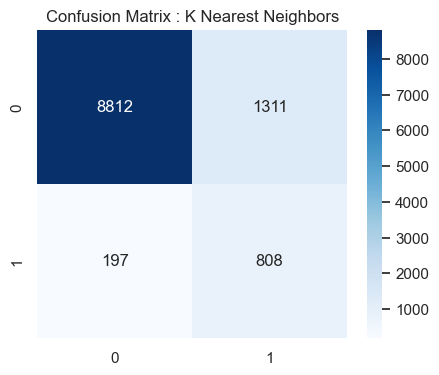

------------------------------------------------------------------------

Gradient Boosting 

Gradient Boosting Train Accuracy: 91.14 %

Scores for Gradient Boosting

              precision    recall  f1-score   support

           0       0.98      0.89      0.93     10123
           1       0.41      0.81      0.55      1005

    accuracy                           0.88     11128
   macro avg       0.70      0.85      0.74     11128
weighted avg       0.93      0.88      0.90     11128

Test Accuracy: 0.88


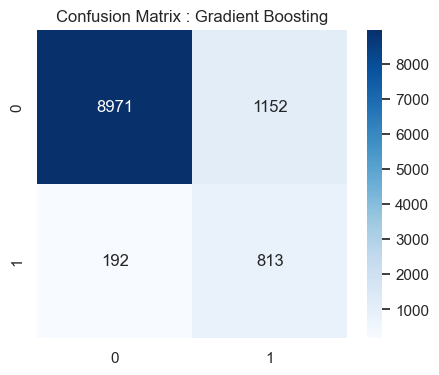

------------------------------------------------------------------------

Voting Classifier(Hard) 

Voting Classifier(Hard) Train Accuracy: 95.24 %

Scores for Voting Classifier(Hard)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     10123
           1       0.52      0.64      0.58      1005

    accuracy                           0.91     11128
   macro avg       0.74      0.79      0.76     11128
weighted avg       0.92      0.91      0.92     11128

Test Accuracy: 0.91


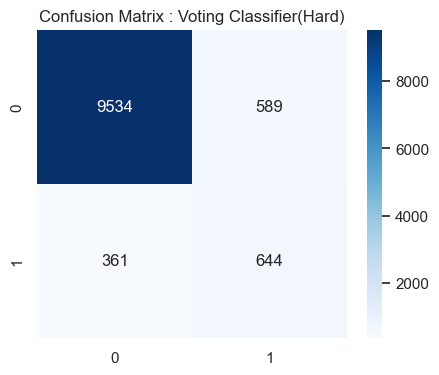

------------------------------------------------------------------------

Voting Classifier(Soft) 

Voting Classifier(Soft) Train Accuracy: 94.88 %

Scores for Voting Classifier(Soft)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     10123
           1       0.50      0.60      0.55      1005

    accuracy                           0.91     11128
   macro avg       0.73      0.77      0.75     11128
weighted avg       0.92      0.91      0.91     11128

Test Accuracy: 0.91


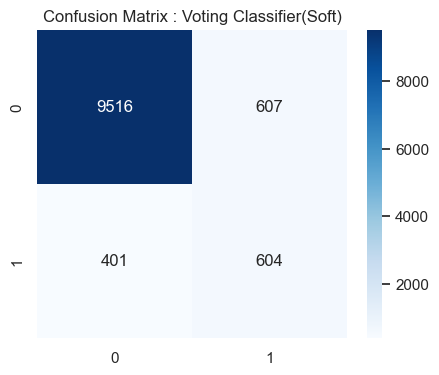

------------------------------------------------------------------------


In [70]:
#1 Logistic regression
log = LogisticRegression(max_iter = 1000)

#2 Random Tree Classifier
random = RandomForestClassifier()

#3 Decision Tree
dtree = DecisionTreeClassifier()

#4 XG Boost
xgb_model = XGBClassifier()

#4 KNN
knn = KNeighborsClassifier()

#5 Gradient Boosting
gb=GradientBoostingClassifier()


xgb = XGBClassifier()
rfc = RandomForestClassifier(random_state=42, n_jobs=-1)
dtree = DecisionTreeClassifier()

#6 Voting Hard
voting_hard = VotingClassifier(
    estimators=[('random_forest', rfc), ('xg_boost', xgb),('decision_tree', dtree)],
    voting='hard')

#7 Voting Soft
voting_soft = VotingClassifier(
    estimators=[('random_forest', rfc), ('xg_boost', xgb),('decision_tree', dtree)],
    voting='soft')

cv_dict = {0: 'Logistic Regression', 1:'Random Tree Classifier', 2: 'Decision Tree', 3: 'Xg Boost', 4: 'K Nearest Neighbors', 5: 'Gradient Boosting', 6:'Voting Classifier(Hard)', 7 : 'Voting Classifier(Soft)'}
cv_models=[log,random,dtree,xgb,knn,gb,voting_hard,voting_soft]


for i,model in enumerate(cv_models):

    print('=================================================================\n')
    print(cv_dict[i],'\n')

    print("{} Train Accuracy: {} %\n".format(cv_dict[i],round(cross_val_score(model, X_train, Y_train, cv=10, scoring ='accuracy').mean()*100,2))) 

    model.fit(X_train, Y_train)
    ypred = model.predict(X_test)

    printClassificationAndConfusionMatrix(Y_test,ypred,cv_dict[i])

    print('------------------------------------------------------------------------')

